In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'eye-diseases-classification:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2440665%2F4130910%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240711%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240711T085645Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7f91340f6c22802658d072de96286f225f869769b570a3ad7929dd484aae94d15644360795bce3548888d4f8543bfbd622869c170d9451bb13e57e145ddb6133b4d17cb059e61c8e851818131664349a8f06fea45d58a4e11c812ee1bab9babe91d15d2837a732d0cc599f88ac2117cdf52268bc7dcda56a262bf0958fe97c37cbd286a74150573dda9d9a93eaeb6b72dae0a222d69c858a09162fff0fa76352d2b05e75d467c753754245218dc176d89066bacb3c4e5000bb2ca5ccf0240592e0d7bd996d0fe0de8000690e35ca9a5db12083eaec5735971c28068a9af2156ef5495d44101255c20dd3a1d2f6322a6a69ee08fc3a1ce3c2f4b52a35de20fc12'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 771355331 bytes downloaded
Downloaded and uncompressed: eye-diseases-classification
Data source import complete.


<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Eye Disease 🦠(RNN)</span>
         <!-- <img src="https://pin.it/6mmgqwOvV" alt="Cartoon Character" style="height: 50px; width: auto;"> -->
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


<img src="https://www.mississippivision.com/wp-content/uploads/diabetic-retinopathy-1-2048x902.jpeg" style="width:100%">

<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">About author 👨‍💻 </span>
         <!-- <img src="https://pin.it/6mmgqwOvV" alt="Cartoon Character" style="height: 50px; width: auto;"> -->
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


**Hi 👋 everyone! Welcome to my notebook. 📓 I'm Danish Mubashar and passionate about data science, and I'm excited to share my findings with you. 🤓 In my recent notebook, I successfully implemented a Convolutional Neural Network (RNN) on the Eye Disease dataset. If you find this notebook helpful, please upvote ! ❤️**

**🤝 I am eager to cultivate enriching collaborations, foster knowledge exchange, and forge strategic alliances within the vibrant data science community. Join me on Kaggle or any other suitable platform to co-create, ideate, and elevate our collective expertise. Let's embark on a journey of innovation and discovery together!**

### **Connect Me**

* [Kaggle](https://www.kaggle.com/danishmubashar)
* [Gmail](danish608186@gmail.com)
* [Linkedin](https://www.linkedin.com/in/muhammad-danish-mubashar-002b912a0/?originalSubdomain=pk)



<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">About dataset 📊</span>
         <!-- <img src="https://pin.it/6mmgqwOvV" alt="Cartoon Character" style="height: 50px; width: auto;"> -->
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


# **Summary**
**Our eyes are one of the most important senses that help us to make contact with each other and allow us to see the beauty and abomination around us. Eyes are susceptible to diseases. Eye diseases include **Glaucoma**, **Diabetic retinopathy**, and **Cataracts**.**Early diagnosis and treatment of eye diseases can preserve eyesight.**

# **Eye Diseases**
- **Glaucoma: Group of eye diseases that can damage the optic nerve. The optic nerve is responsible for transmitting visual information from the eye to the brain. Glaucoma can lead to permanent vision loss and, in some cases, blindness.**

- **Diabetic retinopathy: It's an eye condition that affects people with diabetes. High blood sugar leaves damaged vessels in the retina. The retina is that part of your eyes that can detect light and send signals to the brain. Damage to these blood vessels can lead to vision loss and blindness in some cases.**

- **Cataracts: Cataracts cloud the natural eye lens, leading to blurry vision and difficulty seeing clearly. Aging is one of the main reasons for this disease, but it can also be caused by factors such as injury, genetics, or medication effects. Cataracts can make natural vision blurry, cloudy, and even double it.**

**By better understanding these eye diseases, their causes, and their effects on vision, we can develop insights to aid their early detection and effective management. This notebook tries to classify these diseases from pictures.**


<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">about model(RNN) 🚀</span>
         <!-- <img src="https://pin.it/6mmgqwOvV" alt="Cartoon Character" style="height: 50px; width: auto;"> -->
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


# **Recurrent Neural Networks (RNNs) 🔄🧠**

**RNNs are a type of deep learning architecture widely used for processing sequential data. They excel at capturing temporal dependencies and have applications in various domains. 📚🔍**

## **How RNNs Work 🔄**

**RNNs mimic the human brain's ability to process and understand sequential information. They introduce recurrent connections within the network, allowing information to persist and be passed from one step to another within the sequence. 🕒🔁**

**RNNs process sequential data step by step, considering the context of previous steps while analyzing the current step. At each step, the network takes an input and combines it with the hidden state from the previous step to generate an output and update the hidden state for the next step. 🚶‍♂️🔄**

## **Capturing Dependencies and Long-term Context 🧠🔗**

**RNNs are particularly effective at capturing temporal dependencies in sequences. They can model and understand the relationships between elements that appear at different positions within the sequence. This ability enables them to capture long-term dependencies, making them valuable for tasks involving sequential data. 📈🔍**

**However, RNNs can face challenges in maintaining and propagating information over long sequences due to the vanishing gradient problem. To address this limitation, variants of RNNs such as Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) have been developed. These variants introduce gating mechanisms that help the network selectively update and retain information, mitigating the vanishing gradient problem. 📉🔒**

## **Applications of RNNs 🌐📊**

**RNNs find applications in several domains, including:**

- **Natural Language Processing (NLP): RNNs can process and generate human language, making them useful for tasks like language modeling, sentiment analysis, and machine translation. 🗣️✍️🌐**
- **Speech Recognition: RNNs are employed in speech recognition systems to convert spoken language into written text. 🎙️📝**
- **Time Series Analysis: RNNs can analyze and predict patterns in time-dependent data, making them valuable for tasks such as stock market forecasting or weather prediction. ⏰📈🌦️**


<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Libraries 📚</span>
         <!-- <img src="https://pin.it/6mmgqwOvV" alt="Cartoon Character" style="height: 50px; width: auto;"> -->
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


In [ ]:
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Corrected import statement
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Preprocessing 🛠️</span>
         <!-- <img src="https://pin.it/6mmgqwOvV" alt="Cartoon Character" style="height: 50px; width: auto;"> -->
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


In [ ]:
# Define rescaling layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load train dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/eye-diseases-classification/dataset',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',  # Assuming you have multiple classes
)

# Preprocess train dataset (rescale)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/eye-diseases-classification/dataset',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',  # Assuming you have multiple classes
)

# Preprocess validation dataset (rescale)
validation_ds = validation_ds.map(lambda x, y: (rescale(x), y))

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory='/kaggle/input/eye-diseases-classification/dataset',  # Specify the directory for the test dataset
    batch_size=32,
    image_size=(256, 256),
    label_mode='categorical',  # Assuming you have multiple classes
    shuffle=False,
)

# Preprocess test dataset (rescale)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 4217 files belonging to 4 classes.
Using 3374 files for training.
Found 4217 files belonging to 4 classes.
Using 843 files for validation.
Found 4217 files belonging to 4 classes.


## **Check Shape After Preprocessing**

In [ ]:
# Check the first image shape in the training dataset
print("Shape of the first image in the training dataset:", next(iter(train_ds))[0][0].shape)
# Check the first image shape in the validation dataset
print("Shape of the first image in the validation dataset:", next(iter(validation_ds))[0][0].shape)
# Check the first image shape in the test dataset
print("Shape of the first image in the test dataset:", next(iter(test_ds))[0][0].shape)

Shape of the first image in the training dataset: (256, 256, 3)
Shape of the first image in the validation dataset: (256, 256, 3)
Shape of the first image in the test dataset: (256, 256, 3)


## **Check Pixel Value After Preprocessing**

In [ ]:
# Initialize variables to store minimum and maximum pixel values
min_pixel_value = float('inf')
max_pixel_value = float('-inf')

# Iterate through the dataset
for images, _ in train_ds:
    # Compute the minimum and maximum pixel values in the current batch of images
    batch_min = tf.reduce_min(images)
    batch_max = tf.reduce_max(images)

    # Update overall minimum and maximum pixel values
    min_pixel_value = tf.minimum(min_pixel_value, batch_min)
    max_pixel_value = tf.maximum(max_pixel_value, batch_max)

# Print the minimum and maximum pixel values
print("Minimum pixel value:", min_pixel_value.numpy())
print("Maximum pixel value:", max_pixel_value.numpy())


Minimum pixel value: 0.0
Maximum pixel value: 1.0


<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Visualization 🕵</span>
         <!-- <img src="https://pin.it/6mmgqwOvV" alt="Cartoon Character" style="height: 50px; width: auto;"> -->
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


In [ ]:
def visualize_images(path, target_size=(256, 256), num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image and resize
        image_path = os.path.join(path, image_filename)
        image = Image.open(image_path)
        image = image.resize(target_size)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Cataract 👁️‍🗨️</span>
         <!-- <img src="https://pin.it/6mmgqwOvV" alt="Cartoon Character" style="height: 50px; width: auto;"> -->
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


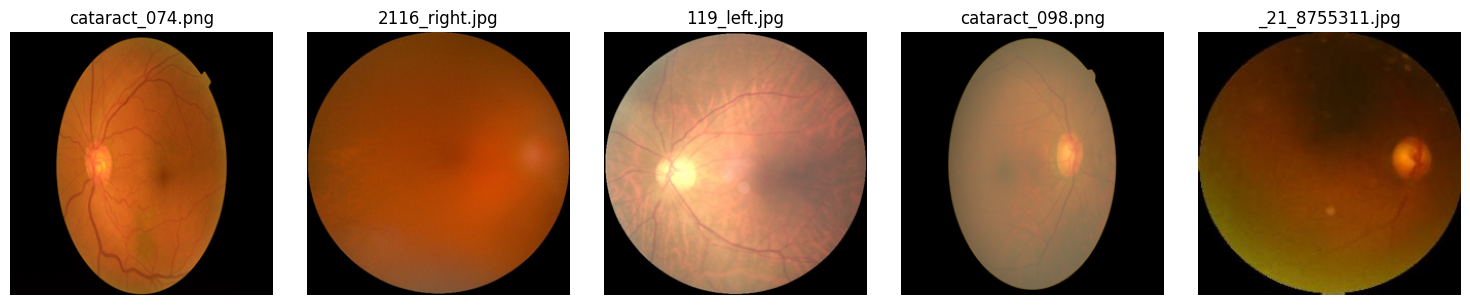

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/eye-diseases-classification/dataset/cataract"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Diabetic-Retinopathy 🦠</span>
         <!-- <img src="https://pin.it/6mmgqwOvV" alt="Cartoon Character" style="height: 50px; width: auto;"> -->
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


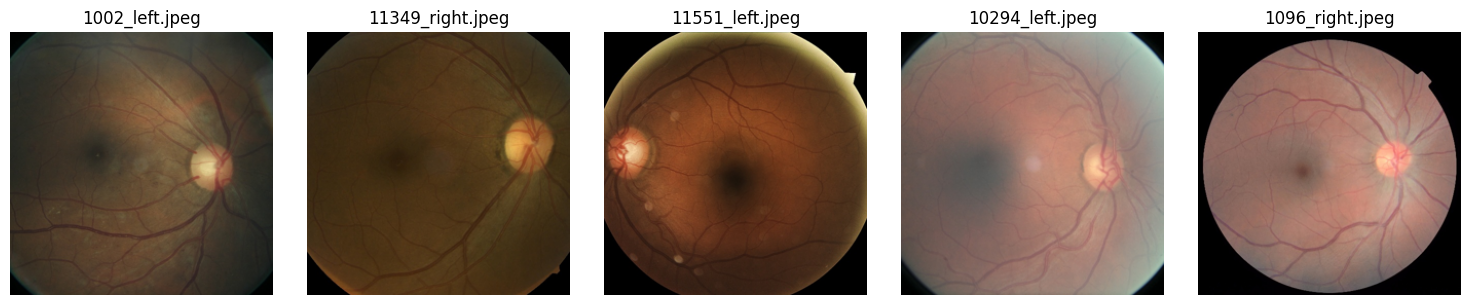

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Glaucoma 🧿</span>
         <!-- <img src="https://pin.it/6mmgqwOvV" alt="Cartoon Character" style="height: 50px; width: auto;"> -->
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


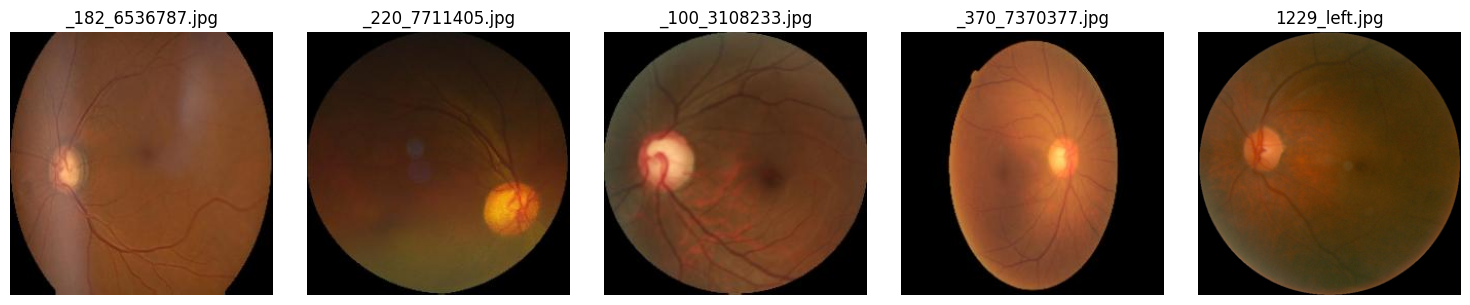

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/eye-diseases-classification/dataset/glaucoma"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Normal 𓆩 👁️ 𓆪</span>
         <!-- <img src="https://pin.it/6mmgqwOvV" alt="Cartoon Character" style="height: 50px; width: auto;"> -->
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


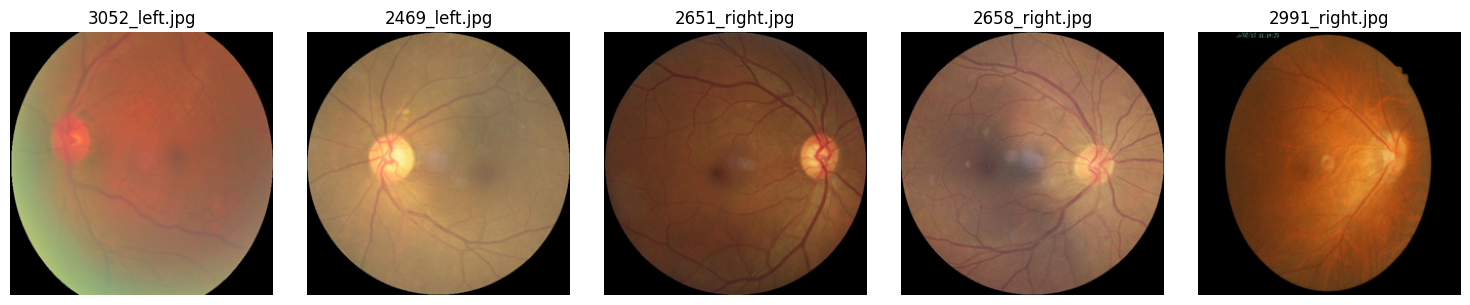

In [ ]:
# Specify the path containing the images to visualize
path_to_visualize = "/kaggle/input/eye-diseases-classification/dataset/normal"

# Visualize 5 random images
visualize_images(path_to_visualize, num_images=5)

<a id="1"></a>
<div id="animated-container" style="position: relative;
            border-radius: 10px;
            padding: 10px;
            font-family: Arial, sans-serif;
            font-size: 36px;
            font-weight: 900;
            color: black;
            display: inline-block;
            text-transform: uppercase;
            box-shadow: 2px 2px 4px #888;
            text-shadow: 2px 2px 4px #888;
            overflow: hidden;
            background-color: #800606 ;
            cursor: pointer;" onclick="toggleAnimation()"> <!-- Added cursor pointer and onclick event -->
    <div style="position: absolute;
                top: 50%;
                right: 0; /* Adjusted to place on the right side */
                transform: translateY(45%);">
        <!-- <img src="https://www.kaggle.com/static/images/tier-animation-transparent.gif" alt="Cartoon Character" style="height: 100px; width: auto;"> -->
    </div>
    <div style="font-weight: bold;"></div>
    <span style="font-style: italic; text-shadow: 2px 2px 4px #888; color: white;">Model 🤖</span>
         <!-- <img src="https://pin.it/6mmgqwOvV" alt="Cartoon Character" style="height: 50px; width: auto;"> -->
</div>

<script>
    function toggleAnimation() {
        var container = document.getElementById('animated-container');
        var animationDiv = container.querySelector('div');
        if (animationDiv.style.animationPlayState === 'paused') {
            animationDiv.style.animationPlayState = 'running';
        } else {
            animationDiv.style.animationPlayState = 'paused';
        }
    }
</script>


## **Build Model & Check Summary**

In [ ]:

# Define RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Reshape((64, 1)),  # Reshape for RNN input
    tf.keras.layers.SimpleRNN(32),  # Simple RNN layer
    tf.keras.layers.Dense(4, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

## **Fit Model**

In [ ]:

# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Fit the model with callbacks
history = model.fit(train_ds,
                    validation_data=validation_ds,
                    epochs=50,
                    callbacks=[early_stopping])

Epoch 1/50
106/106 [==============================] - 38s 270ms/step - loss: 1.0865 - accuracy: 0.5018 - val_loss: 0.8698 - val_accuracy: 0.5753
Epoch 2/50
106/106 [==============================] - 28s 250ms/step - loss: 0.8049 - accuracy: 0.6082 - val_loss: 0.7883 - val_accuracy: 0.6157
Epoch 3/50
106/106 [==============================] - 28s 255ms/step - loss: 0.7706 - accuracy: 0.6245 - val_loss: 0.7964 - val_accuracy: 0.6074
Epoch 4/50
106/106 [==============================] - 28s 252ms/step - loss: 0.7013 - accuracy: 0.6772 - val_loss: 0.7384 - val_accuracy: 0.6489
Epoch 5/50
106/106 [==============================] - 28s 245ms/step - loss: 0.6389 - accuracy: 0.7202 - val_loss: 0.6114 - val_accuracy: 0.7295
Epoch 6/50
106/106 [==============================] - 28s 248ms/step - loss: 0.5799 - accuracy: 0.7501 - val_loss: 0.5657 - val_accuracy: 0.7580
Epoch 7/50
106/106 [==============================] - 29s 262ms/step - loss: 0.5548 - accuracy: 0.7662 - val_loss: 0.5409 - val_ac

## **Evaluate Model**

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test accuracy:", test_accuracy)

132/132 [==============================] - 21s 160ms/step - loss: 0.3410 - accuracy: 0.8738
Test accuracy: 0.8738439679145813


## **History Plot**

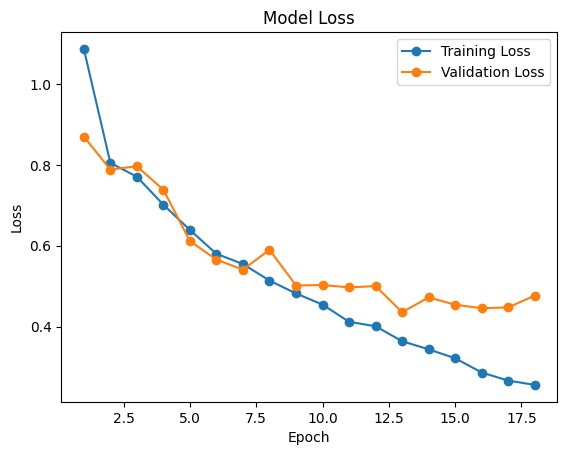

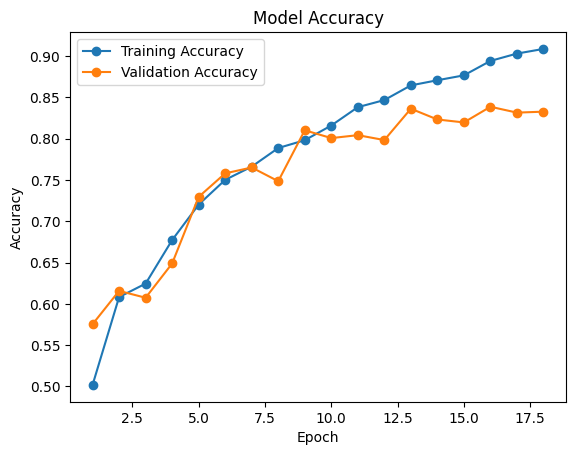

In [ ]:

# Define epochs
epochs = range(1, len(history.history['loss']) + 1)

# Plot training & validation loss
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [1]:
model.save('/content/drive/MyDrive/Colab Notebooks')

NameError: name 'model' is not defined

In [ ]:
model.save('/content/drive/MyDrive/model.h5')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install gdown
!gdown 1q3DxnSan6-dptflvJLHjrSH9IV8lM7Wn

Downloading...
From: https://drive.google.com/uc?id=1q3DxnSan6-dptflvJLHjrSH9IV8lM7Wn
To: /content/model.h5
100% 45.0M/45.0M [00:01<00:00, 41.2MB/s]


In [2]:
!pip install gradio tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 111.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.

FileUpload(value={}, accept='image/*', description='Upload', multiple=True)

1/1 [==============================] - 0s 161ms/step
Predicted class index: 1


<ipython-input-18-aaff6abba11a>:30: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font)


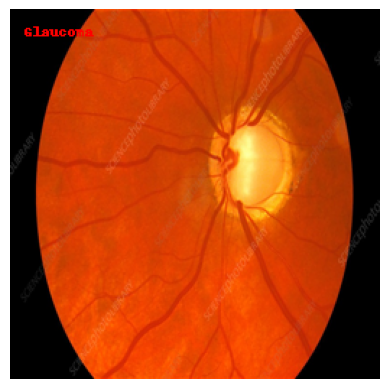

1/1 [==============================] - 0s 33ms/step
Predicted class index: 2


<ipython-input-18-aaff6abba11a>:30: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font)


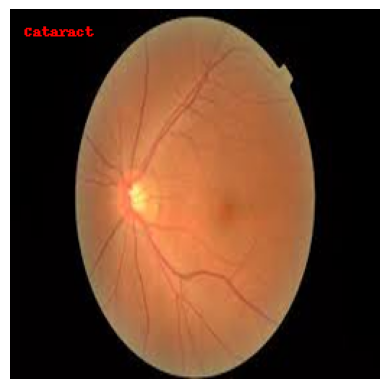

1/1 [==============================] - 0s 23ms/step
Predicted class index: 2


<ipython-input-18-aaff6abba11a>:30: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font)


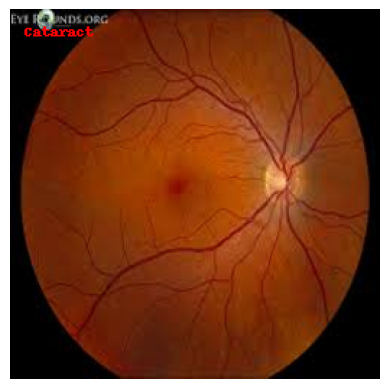

1/1 [==============================] - 0s 23ms/step
Predicted class index: 3


<ipython-input-18-aaff6abba11a>:30: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  text_size = draw.textsize(text, font)


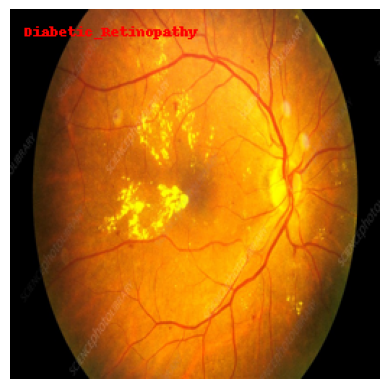

In [18]:
import ipywidgets as widgets
from IPython.display import display
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import io
from PIL import Image, ImageDraw, ImageFont
from tensorflow.keras.models import load_model

# Load your trained model
trained_model = load_model('/content/model.h5')  # Update with your model path

# File upload widget
upload = widgets.FileUpload(accept='image/*', multiple=True)
display(upload)

# Function to load and preprocess a custom image
def load_and_preprocess_image(img_data, target_size):
    img = Image.open(io.BytesIO(img_data))
    img = img.resize(target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array, img

# Function to overlay text on image
def overlay_text_on_image(img, text):
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()
    text_size = draw.textsize(text, font)
    text_position = (10, 10)  # Position at the top-left corner
    draw.text(text_position, text, font=font, fill="red")
    return img

# Function to make predictions on custom images
def predict_custom_images(change):
    for name, file_info in upload.value.items():
        img_data = file_info['content']
        img_array, img = load_and_preprocess_image(img_data, target_size)
        prediction = trained_model.predict(img_array)
        predicted_class = np.argmax(prediction)

        # Debug print to check predicted class index
        print(f"Predicted class index: {predicted_class}")

        # Replace with your class names if available
        class_names = ['Healthy', 'Glaucoma', 'Cataract']  # Update with actual class names

        # Check if predicted_class is within bounds
        if predicted_class < len(class_names):
            disease_name = class_names[predicted_class]
        else:
            disease_name = 'Diabetic_Retinopathy'

        # Overlay prediction text on image
        img_with_text = overlay_text_on_image(img, disease_name)

        # Display image
        plt.figure()
        plt.imshow(img_with_text)
        plt.axis('off')
        plt.show()

# Set up target size
target_size = (256, 256)  # Replace with your model's input size

# Add event handler to upload widget
upload.observe(predict_custom_images, names='value')